/tmp/ipython-input-451506573.py:12: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon Sale Report.csv')


Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount         

/tmp/ipython-input-451506573.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(0, inplace=True)
/tmp/ipython-input-451506573.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({c


Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128975 non-null  int64         
 1   Order ID            128975 non-null  object        
 2   Date                128975 non-null  datetime64[ns]
 3   Status              128975 non-null  object        
 4   Fulfilment          128975 non-null  object        
 5   Sales Channel       128975 non-null  object        
 6   ship_service_level  128975 non-null  object        
 7   Style               128975 non-null  object        
 8   SKU                 128975 non-null  object        
 9   Category            128975 non-null  object        
 10  Size                128975 non-null  object        
 11  ASIN                128975 non-null  object        
 12  Courier Status      128975 non-null  object        
 13  Qty      

/tmp/ipython-input-451506573.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x='Amount', y='ship_state', palette='viridis')
/tmp/ipython-input-451506573.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories, x='Amount', y='Category', palette='plasma')


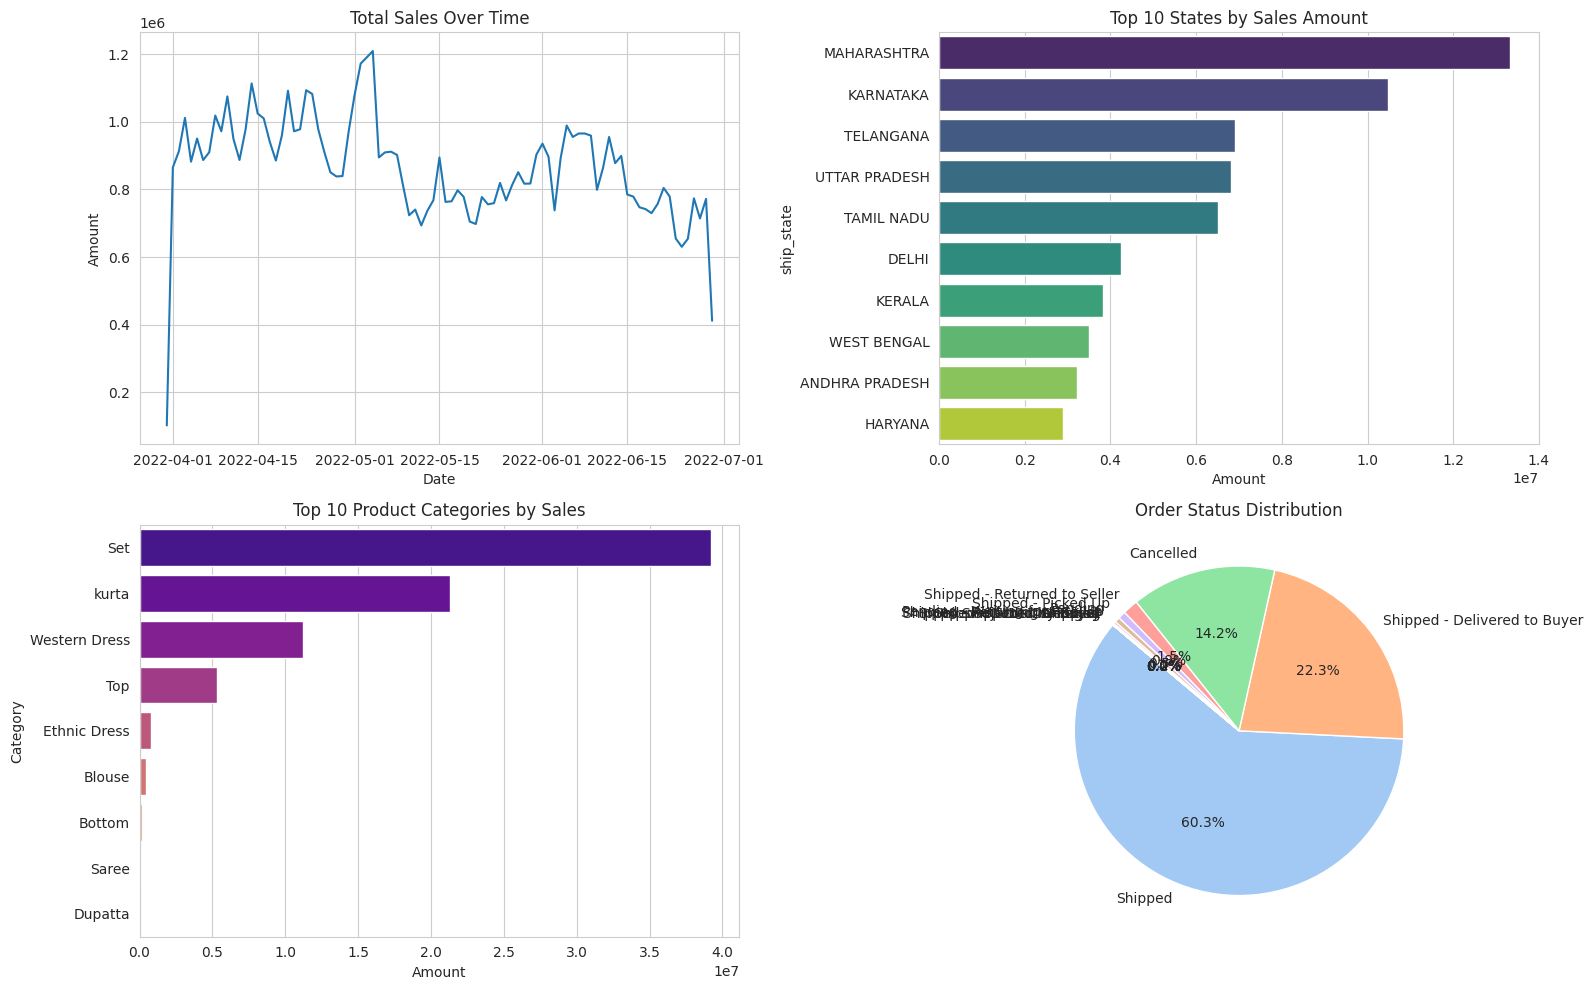


--- SQL Analysis ---

Top 10 States by Sales (SQL):
       ship_state  total_sales
0     MAHARASHTRA  13335534.14
1       KARNATAKA  10481114.37
2       TELANGANA   6916615.65
3   UTTAR PRADESH   6816642.08
4      TAMIL NADU   6515650.11
5           DELHI   4235215.97
6          KERALA   3830227.58
7     WEST BENGAL   3507880.44
8  ANDHRA PRADESH   3219831.72
9         HARYANA   2882092.99

Top 10 Categories by Number of Orders (SQL):
        Category  number_of_orders
0            Set             50284
1          kurta             49877
2  Western Dress             15500
3            Top             10622
4   Ethnic Dress              1159
5         Blouse               926
6         Bottom               440
7          Saree               164
8        Dupatta                 3

Average Order Amount (SQL):
   average_order_amount
0            661.348556

Sales by Shipping Service Level (SQL):
  ship_service_level  total_sales  total_orders
0          Expedited   54285183.0         886

In [ ]:
!pip install -q pandasql

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

pysqldf = lambda q: sqldf(q, globals())

#  Load and Inspect the Data ---
try:
    df = pd.read_csv('Amazon Sale Report.csv')

    print("Initial Data Info:")
    df.info()

except FileNotFoundError:
    print("Error: 'Amazon Sale Report.csv' not found.")
    print("Please make sure you have uploaded the file to your Colab session.")

    #  Data Cleaning and Preprocessing ---

df.drop(['Unnamed: 22', 'fulfilled-by'], axis=1, inplace=True, errors='ignore')

for col in df.columns:

    if df[col].dtype == 'object':
        df[col].fillna('Unknown', inplace=True)
    else:
        df[col].fillna(0, inplace=True)

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df.columns = df.columns.str.strip().str.replace('-', '_')

print("\nCleaned Data Info:")
df.info()
# - Exploratory Data Analysis (EDA) ---


sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))

# 1. First Plot: Sales Over Time (Top-Left)
plt.subplot(2, 2, 1)
sales_over_time = df.groupby('Date')['Amount'].sum().reset_index()
sns.lineplot(data=sales_over_time, x='Date', y='Amount')
plt.title('Total Sales Over Time')


# 2. Second Plot: Top 10 States by Sales (Top-Right)
plt.subplot(2, 2, 2)
top_states = df.groupby('ship_state')['Amount'].sum().nlargest(10).reset_index()
sns.barplot(data=top_states, x='Amount', y='ship_state', palette='viridis')
plt.title('Top 10 States by Sales Amount')


# 3. Third Plot: Top 10 Categories by Sales (Bottom-Left)
plt.subplot(2, 2, 3)
top_categories = df.groupby('Category')['Amount'].sum().nlargest(10).reset_index()
sns.barplot(data=top_categories, x='Amount', y='Category', palette='plasma')
plt.title('Top 10 Product Categories by Sales')

# 4. Fourth Plot: Order Status Distribution (Bottom-Right)
plt.subplot(2, 2, 4)
status_counts = df['Status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Order Status Distribution')

# Adjust layout to prevent plots from overlapping and then display them.
plt.tight_layout()
plt.show()

# SQL Analysis
print("\n--- SQL Analysis ---")

# Query 1: Get total sales for the top 10 states.
q1 = """SELECT ship_state, SUM(Amount) AS total_sales FROM df WHERE ship_state != 'Unknown' GROUP BY ship_state ORDER BY total_sales DESC LIMIT 10;"""
print("\nTop 10 States by Sales (SQL):")
print(pysqldf(q1))

# Query 2: Count orders for the top 10 categories.
q2 = """SELECT Category, COUNT("Order_ID") AS number_of_orders FROM df GROUP BY Category ORDER BY number_of_orders DESC LIMIT 10;"""
print("\nTop 10 Categories by Number of Orders (SQL):")
print(pysqldf(q2))

# Query 3: Calculate the average value of an order.
q3 = """SELECT AVG(Amount) AS average_order_amount FROM df WHERE Amount > 0;"""
print("\nAverage Order Amount (SQL):")
print(pysqldf(q3))

# Query 4: Sum up sales based on the shipping service used.
q4 = """SELECT ship_service_level, SUM(Amount) as total_sales, COUNT("Order_ID") as total_orders FROM df GROUP BY ship_service_level ORDER BY total_sales DESC;"""
print("\nSales by Shipping Service Level (SQL):")
print(pysqldf(q4))